In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Survey on OTT (Responses)Correction.csv') 
df.head() 
df.info() 
print(df.describe()) 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Name                                      353 non-null    object
 1   Gender                                    353 non-null    object
 2   Age                                       353 non-null    object
 3   Profession                                353 non-null    object
 4   Monthly Income                            353 non-null    object
 5   Location                                  353 non-null    object
 6   OTT currently using                       353 non-null    object
 7   OTT currently subscribed                  353 non-null    object
 8   OTTmostly                                 353 non-null    object
 9   Years                                     353 non-null    object
 10  Count of OTT using                        353 non-

In [2]:
# 1. Basic cleaning & missing values

print("Missing values per column:")
print(df.isna().sum())
likert_cols = [
    "Binge-watch content",
    "Download offline viewing",
    "Original content",
    "Movies theatres",
    "Social features",
    "Recommendations",
    "Search function",
    "Rewatch content",
    "subscribe same platform",
    "Subscription price",
    "Share content with others",
    "Share accounts with others",
    "Buffering or lag",
    "Satisfied with the content variety",
    "Overall experience",
    "Feel personalized",
    "Video quality offered"
]

for col in likert_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col].fillna(df[col].median(), inplace=True)

Missing values per column:
Name                                        0
Gender                                      0
Age                                         0
Profession                                  0
Monthly Income                              0
Location                                    0
OTT currently using                         0
OTT currently subscribed                    0
OTTmostly                                   0
Years                                       0
Count of OTT using                          0
Usage                                       0
Time                                        0
Genre                                       0
Content                                     0
Amount                                      0
Access                                      0
Influence                                   0
Choice                                      0
Binge-watch content                         0
Download offline viewing                    0
Origina

In [3]:
# 2. Encode Age (category + numeric)

if "Age" in df.columns:
    age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
    df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

    age_map = {
        "18-24": 21,
        "25-34": 29.5,
        "35-44": 39.5,
        "45-54": 49.5,
        "55-64": 59.5,
        "65+": 70,
    }
    df["Age_num"] = df["Age"].map(age_map)


Value counts for Gender:
Gender
Male      181
Female    172
Name: count, dtype: int64


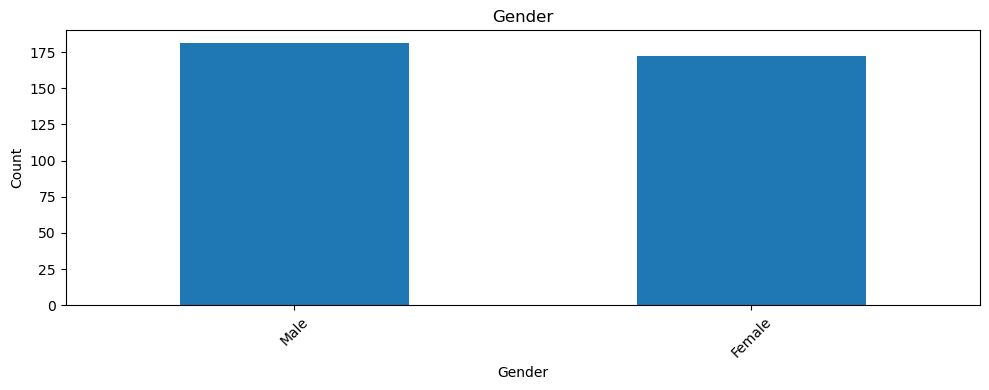


Value counts for Age:
Age
18-24    245
25-34     76
35-44     17
45-54     13
55-64      0
65+        0
Name: count, dtype: int64


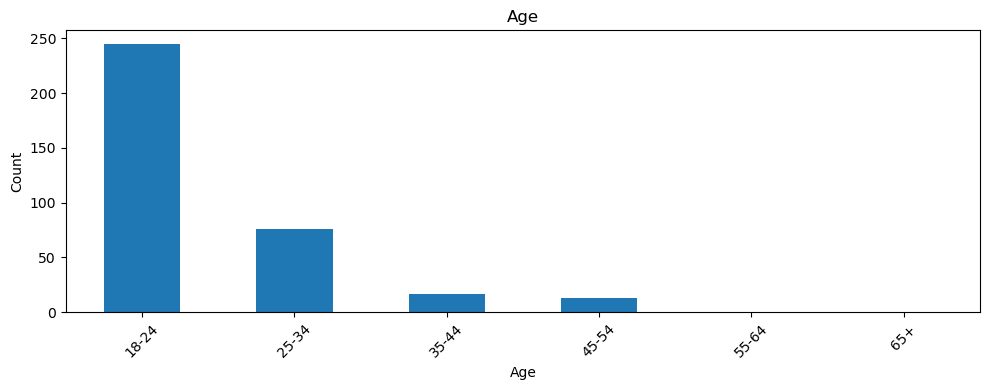


Value counts for Profession:
Profession
Student          201
Employed          87
Self Employed     47
Unemployed        18
Name: count, dtype: int64


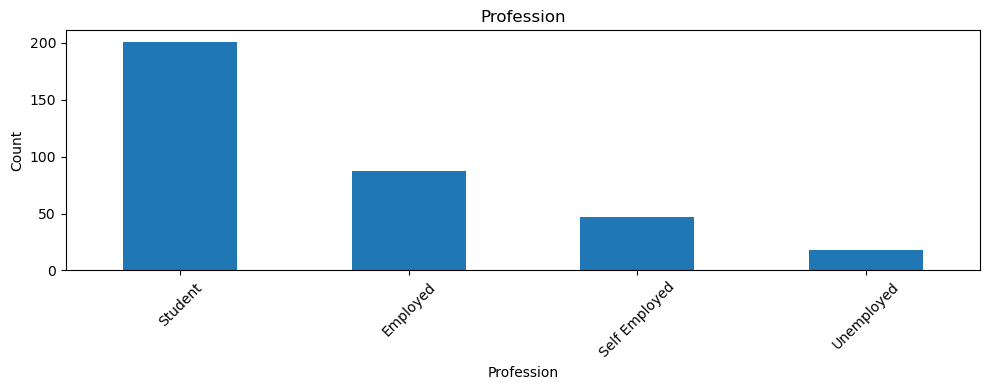


Value counts for Monthly Income:
Monthly Income
Less than 25000     212
25001 – 50000        54
50001 – 75000        32
75001 – 100000       29
100001 and above     24
Less than 25001       2
Name: count, dtype: int64


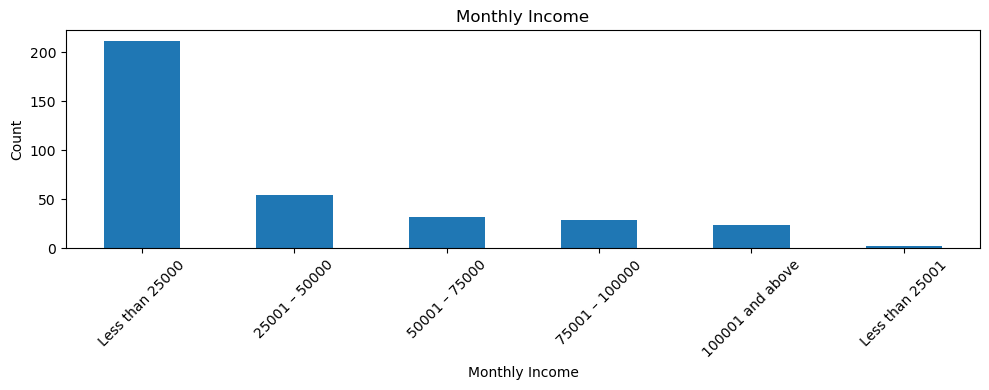


Value counts for Location:
Location
Urban         172
Semi Urban    108
Rural          73
Name: count, dtype: int64


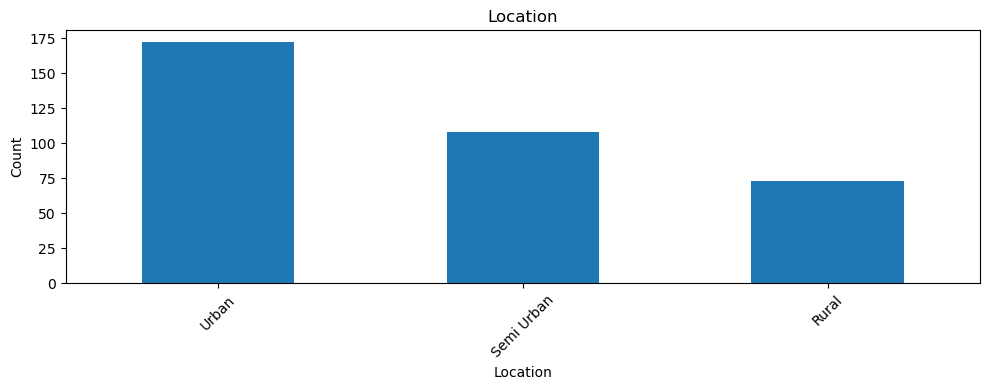

In [4]:
# 3. Descriptive statistics for demographics

cat_cols = ["Gender", "Age", "Profession", "Monthly Income", "Location",
             "OTT currently subscribed", "OTT mostly"]

for col in cat_cols:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

        # Bar chart
        plt.figure(figsize=(10,4))
        df[col].value_counts().plot(kind="bar")
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


OTT mostly by Age:


OTTmostly,Amazon Prime,Disney+ Hotstar,Jio Cinema,Netflix,Nil,Nothing,Sunnxt,Telegram,You Tube,Zee5
Age,,,,,,,,,,
18-24,37,97,19,84,2,1,1,1,1,2
25-34,22,18,1,35,0,0,0,0,0,0
35-44,9,5,0,2,0,0,0,0,0,1
45-54,3,8,2,0,0,0,0,0,0,0


<Figure size 1000x600 with 0 Axes>

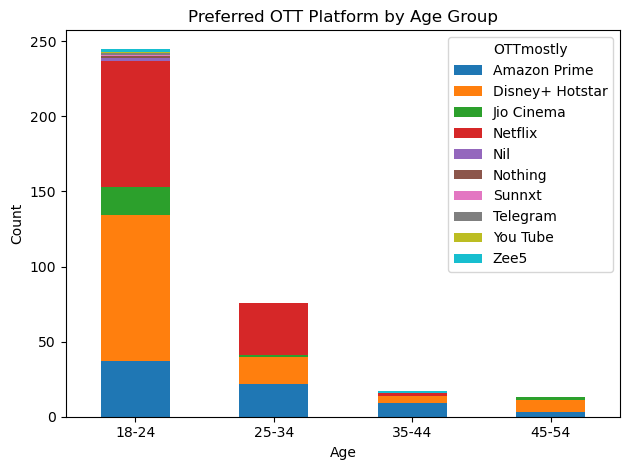

In [5]:
# 4. OTT usage patterns (Cross-tab: OTT mostly vs Age)

%matplotlib inline

age_col = "Age"
ott_col = "OTTmostly"   

if {age_col, ott_col}.issubset(df.columns):
    ctab = pd.crosstab(df[age_col], df[ott_col])

    print("\nOTT mostly by Age:")
    display(ctab)

    plt.figure(figsize=(10,6))
    ctab.plot(kind="bar", stacked=True)
    plt.title("Preferred OTT Platform by Age Group")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Column name mismatch. Check the column names above.")

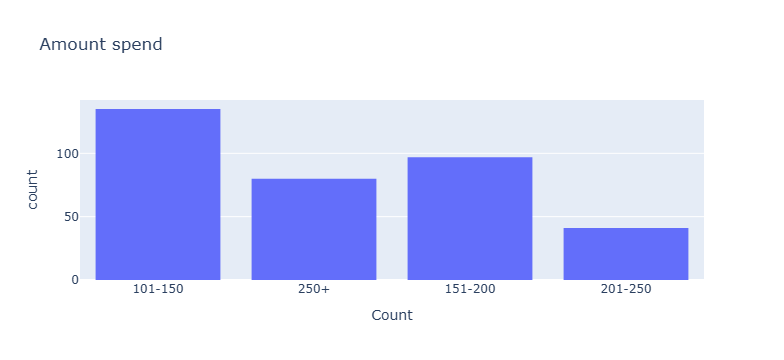

In [6]:
# 5. Amount spent on OTT platforms

fig = px.histogram(df,
                   x='Amount',
                   nbins=20,
                   labels={'Amount': 'Count'},
                   title='Amount spend')
fig.show()

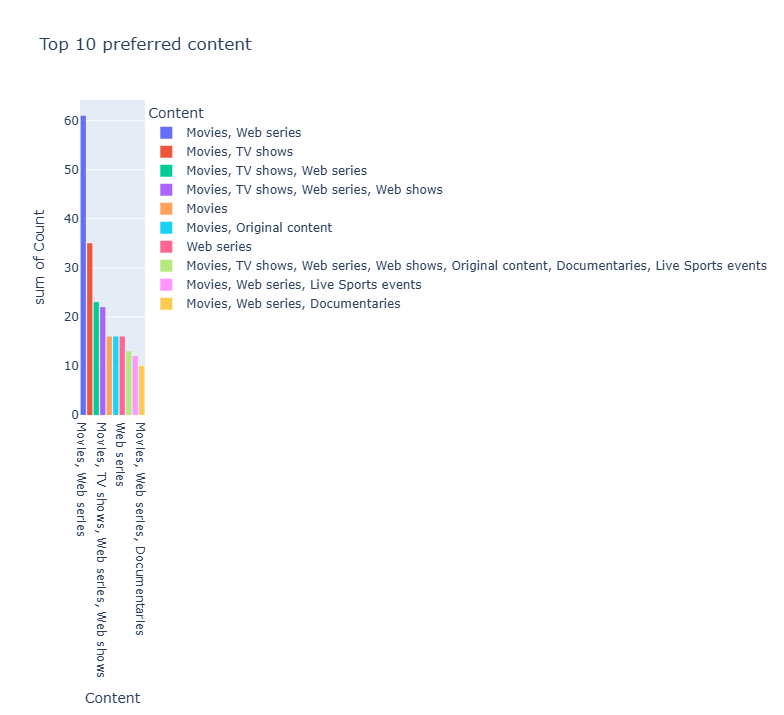

In [7]:
# 6. Top 10 preferred content by users

content_counts = df['Content'].value_counts().sort_values(ascending=False).head(10)
df_top_10_content = pd.DataFrame({'Content': content_counts.index, 'Count': content_counts.values})

fig = px.histogram(
    df_top_10_content,
    x='Content',
    y='Count',
    title='Top 10 preferred content',
    color='Content',
    width=1200,
    height=700
)
fig.show()


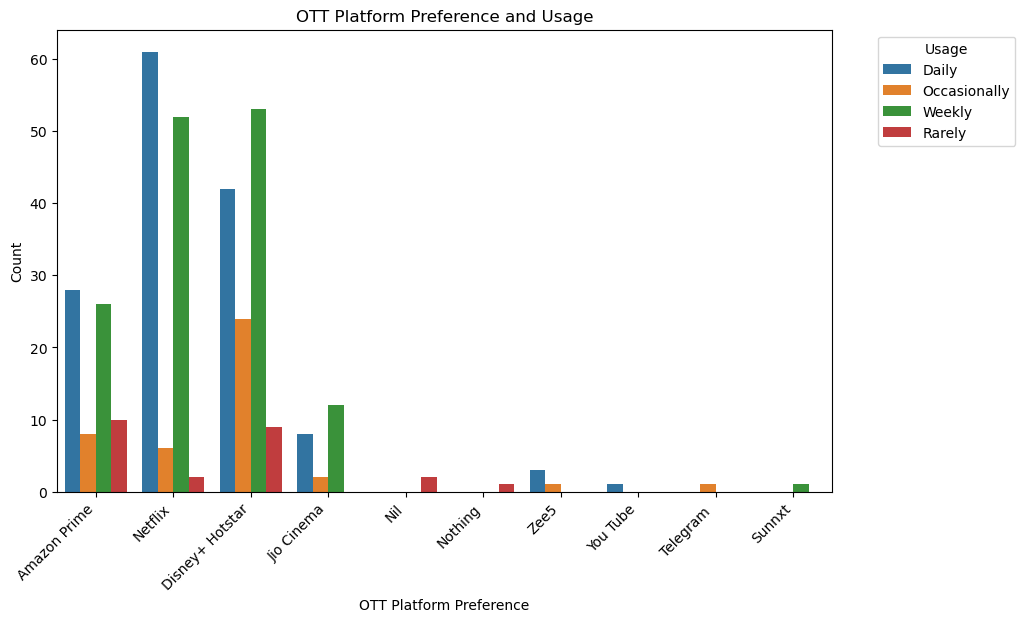

In [8]:
# 7. OTT platfrom preference and usage

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='OTTmostly', hue='Usage')
plt.title('OTT Platform Preference and Usage')
plt.xlabel('OTT Platform Preference')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Average rating for each feature:


Video quality offered         4.138810
Share content with others     3.926346
Search function               3.892351
Recommendations               3.813031
Original content              3.756374
Share accounts with others    3.730878
Rewatch content               3.648725
Social features               3.640227
Movies theatres               3.620397
Download offline viewing      3.447592
dtype: float64

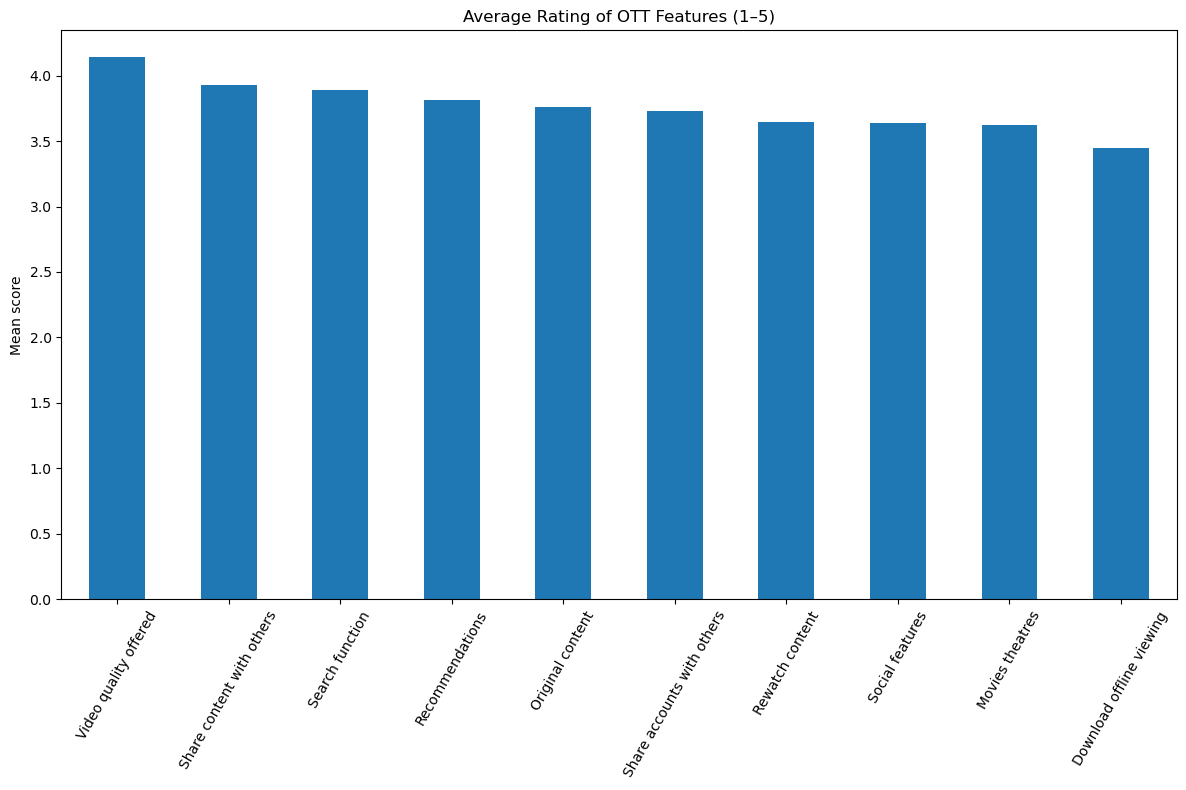

In [9]:
# 8. OTT usage patterns (Cross-tab: OTT mostly vs Age)

present_likert = [c for c in likert_cols if c in df.columns]
likert_means = df[present_likert].mean().sort_values(ascending=False)

print("\nAverage rating for each feature:")
display(likert_means)

plt.figure(figsize=(12,8))
likert_means.plot(kind="bar")
plt.title("Average Rating of OTT Features (1–5)")
plt.ylabel("Mean score")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()